In [17]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found exi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/jiax2/Teams/Playground/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

In [3]:
iphone12_df = df[df['phone_generation'] == 'iphone 12']
iphone12_df = iphone12_df.groupby(['weeks_monday'])['claim'].sum().reset_index()
iphone12_df = iphone12_df.sort_values(by='weeks_monday')
iphone12_df.set_index('weeks_monday', inplace=True)
iphone12_df

,claim
weeks_monday,
2021-06-28,422
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
...,...
2023-01-16,4277
2023-01-23,4136
2023-01-30,3764


In [4]:
## first and last week abnormally low so drop
iphone12_df = iphone12_df.drop(iphone12_df.index[-1])
iphone12_df = iphone12_df.drop(iphone12_df.index[0])
iphone12_df 

,claim
weeks_monday,
2021-07-05,1017
2021-07-12,1045
2021-07-19,1144
2021-07-26,1157
2021-08-02,1212
...,...
2023-01-09,3959
2023-01-16,4277
2023-01-23,4136


<AxesSubplot:xlabel='weeks_monday'>

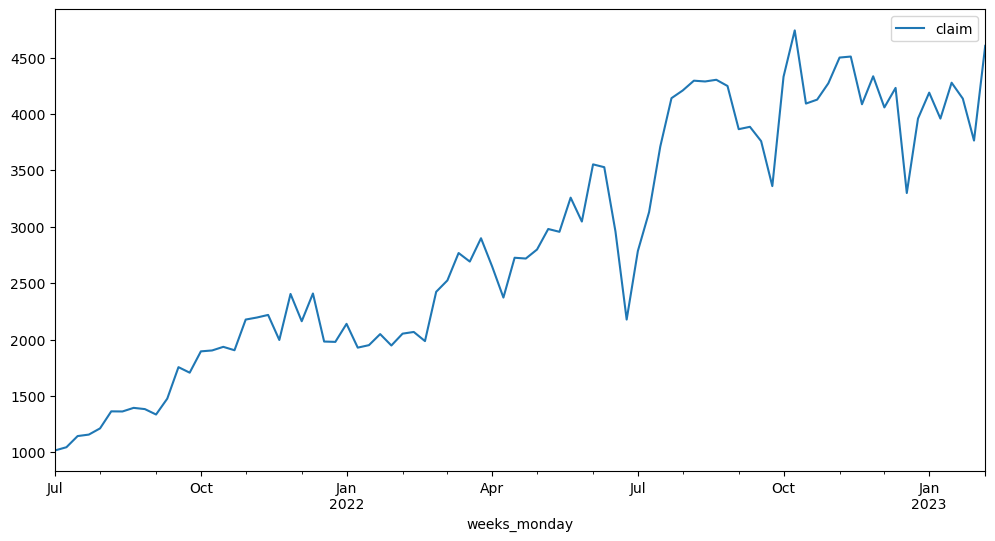

In [6]:
iphone12_df.plot(figsize=(12,6))

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

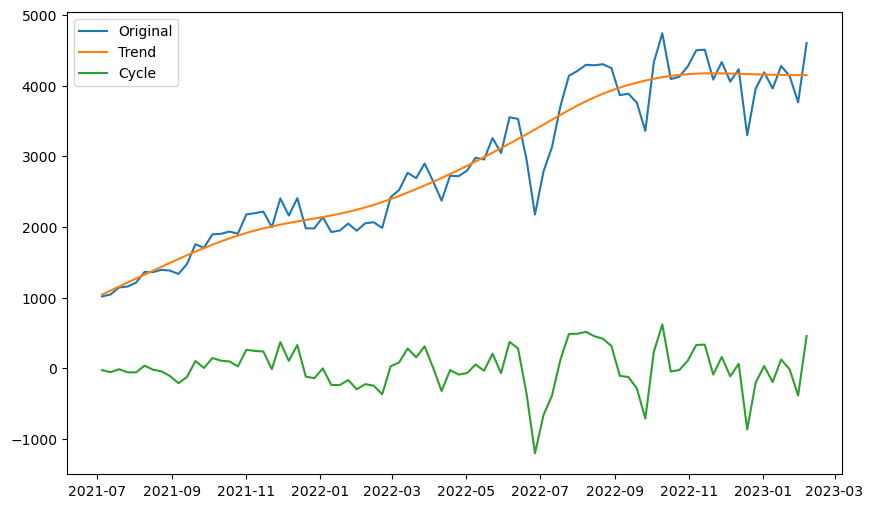

In [9]:
import statsmodels.api as sm

# Apply Hodrick-Prescott filter to the time series
hp_cycle, hp_trend = sm.tsa.filters.hpfilter(iphone12_df['claim'])

# Plot the original time series, the estimated trend, and the cycle component
plt.figure(figsize=(10,6))
plt.plot(iphone12_df['claim'], label='Original')
plt.plot(hp_trend, label='Trend')
plt.plot(hp_cycle, label='Cycle')
plt.legend(loc='best')
plt.show()

In [10]:
len(iphone12_df)

84

In [11]:
train = iphone12_df.iloc[:72]
test = iphone12_df.iloc[72:]

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
iphone12_df.head(), iphone12_df.tail()

(              claim
 weeks_monday       
 2021-07-05     1017
 2021-07-12     1045
 2021-07-19     1144
 2021-07-26     1157
 2021-08-02     1212,
               claim
 weeks_monday       
 2023-01-09     3959
 2023-01-16     4277
 2023-01-23     4136
 2023-01-30     3764
 2023-02-06     4604)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [22]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.0075188  0.03410311]
Predict this y: 
 [[0.03759398]]


In [23]:
X.shape

(1, 3, 1)

In [24]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(generator,epochs=50)

Epoch 1/50
60/60 [==============================] - 1s 4ms/step - loss: 0.0733
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 3/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 4/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 6/50
60/60 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0115
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0147
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 13/50
60/60 [==============================

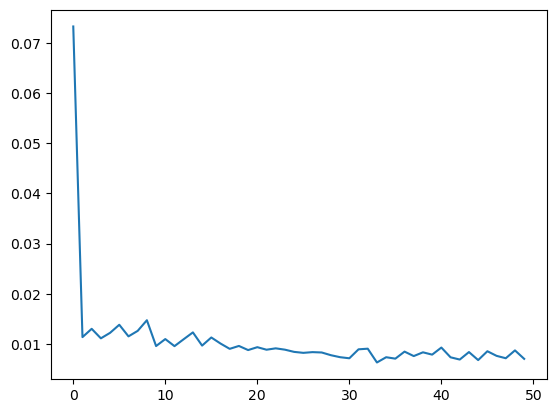

In [29]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [30]:
last_train_batch = scaled_train[-12:]

In [31]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [32]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 243ms/step


array([[0.8841594]], dtype=float32)

In [33]:
scaled_test[0]

array([0.82411386])

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 76ms/step


In [35]:
test_predictions

[array([0.8841594], dtype=float32),
 array([0.8482388], dtype=float32),
 array([0.82616174], dtype=float32),
 array([0.81521875], dtype=float32),
 array([0.81800956], dtype=float32),
 array([0.8307707], dtype=float32),
 array([0.83936334], dtype=float32),
 array([0.84101415], dtype=float32),
 array([0.84227085], dtype=float32),
 array([0.8416436], dtype=float32),
 array([0.83708763], dtype=float32),
 array([0.8276406], dtype=float32)]

In [40]:
test

,claim,Predictions
weeks_monday,,
2022-11-21,4086,4309.609554
2022-11-28,4334,4175.841387
2022-12-05,4058,4093.626328
2022-12-12,4231,4052.874613
2022-12-19,3299,4063.267584
2022-12-26,3959,4110.789980
2023-01-02,4189,4142.789065
2023-01-09,3959,4148.936683
2023-01-16,4277,4153.616650


In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
test['Predictions'] = true_predictions

C:\Users\jiax2\AppData\Local\Temp\ipykernel_5884\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='weeks_monday'>

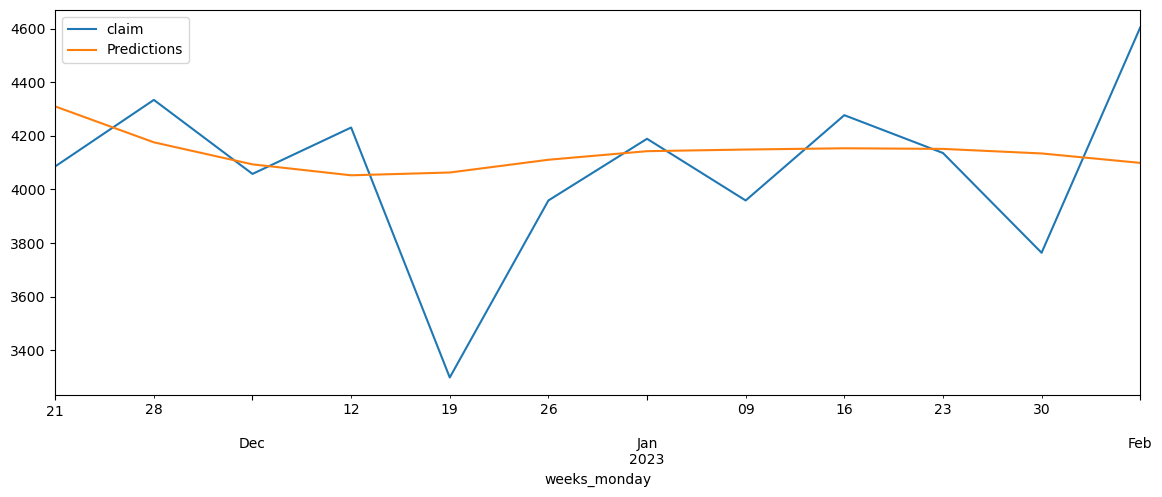

In [39]:
test.plot(figsize=(14,5))

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['claim'],test['Predictions']))
print(rmse)

311.0264690303579
